In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fortune500.csv', encoding='latin1')
df.head()

,Rank,Company Name,Number of Employees,Previous Rank,Revenues,Revenue Change,Profits,Profit Change,Assets,Market Value
0,1,Walmart,"23,00,000",1.0,"$4,85,873",0.8%,"$13,643.0",-7.2%,"$1,98,825","$2,18,619"
1,2,Berkshire Hathaway,"3,67,700",4.0,"$2,23,604",6.1%,"$24,074.0",0.0%,"$6,20,854","$4,11,035"
2,3,Apple,"1,16,000",3.0,"$2,15,639",-7.7%,"$45,687.0",-14.4%,"$3,21,686","$7,53,718"
3,4,Exxon Mobil,"72,700",2.0,"$2,05,004",-16.7%,"$7,840.0",-51.5%,"$3,30,314","$3,40,056"
4,5,McKesson,"68,000",5.0,"$1,92,487",6.2%,"$2,258.0",53.0%,"$56,563","$31,439"


In [4]:
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:\n", df.columns)

print("\nMissing values in each column:\n", df.isnull().sum())

print("\nData types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))

Shape of the dataset: (500, 10)

Columns in the dataset:
 Index(['Rank', 'Company Name', 'Number of Employees', 'Previous Rank',
       'Revenues', 'Revenue Change', 'Profits', 'Profit Change', 'Assets',
       'Market Value'],
      dtype='object')

Missing values in each column:
 Rank                   0
Company Name           0
Number of Employees    0
Previous Rank          8
Revenues               0
Revenue Change         0
Profits                0
Profit Change          0
Assets                 0
Market Value           0
dtype: int64

Data types:
 Rank                     int64
Company Name            object
Number of Employees     object
Previous Rank          float64
Revenues                object
Revenue Change          object
Profits                 object
Profit Change           object
Assets                  object
Market Value            object
dtype: object

Summary Statistics:
               Rank       Company Name Number of Employees  Previous Rank  \
count   500.000000

In [5]:
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nPercentage of missing values in each column:\n", (df.isnull().sum()/len(df))*100)


Missing values in each column:
 Rank                   0
Company Name           0
Number of Employees    0
Previous Rank          8
Revenues               0
Revenue Change         0
Profits                0
Profit Change          0
Assets                 0
Market Value           0
dtype: int64

Percentage of missing values in each column:
 Rank                   0.0
Company Name           0.0
Number of Employees    0.0
Previous Rank          1.6
Revenues               0.0
Revenue Change         0.0
Profits                0.0
Profit Change          0.0
Assets                 0.0
Market Value           0.0
dtype: float64


In [6]:
df['Previous Rank'] = df['Previous Rank'].fillna(df['Previous Rank'].mean())

In [7]:
def clean_currency(col):
    return pd.to_numeric(col.replace({r'[\$,]': ''}, regex=True), errors='coerce')

# Clean all four key columns
df['Revenues']       = clean_currency(df['Revenues'])
df['Profits']        = clean_currency(df['Profits'])
df['Assets']         = clean_currency(df['Assets'])
df['Market Value']   = clean_currency(df['Market Value'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 500 non-null    int64  
 1   Company Name         500 non-null    object 
 2   Number of Employees  500 non-null    object 
 3   Previous Rank        500 non-null    float64
 4   Revenues             500 non-null    int64  
 5   Revenue Change       500 non-null    object 
 6   Profits              499 non-null    float64
 7   Profit Change        500 non-null    object 
 8   Assets               500 non-null    int64  
 9   Market Value         470 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 39.2+ KB


In [9]:
df.isnull().sum()

Rank                    0
Company Name            0
Number of Employees     0
Previous Rank           0
Revenues                0
Revenue Change          0
Profits                 1
Profit Change           0
Assets                  0
Market Value           30
dtype: int64

In [10]:
for col in ['Revenues', 'Profits', 'Market Value']:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/5d/72n_0nvd5k54vykxz8qx9p7h0000gn/T/ipykernel_12662/1745004813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 500 non-null    int64  
 1   Company Name         500 non-null    object 
 2   Number of Employees  500 non-null    object 
 3   Previous Rank        500 non-null    float64
 4   Revenues             500 non-null    int64  
 5   Revenue Change       500 non-null    object 
 6   Profits              500 non-null    float64
 7   Profit Change        500 non-null    object 
 8   Assets               500 non-null    int64  
 9   Market Value         500 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 39.2+ KB


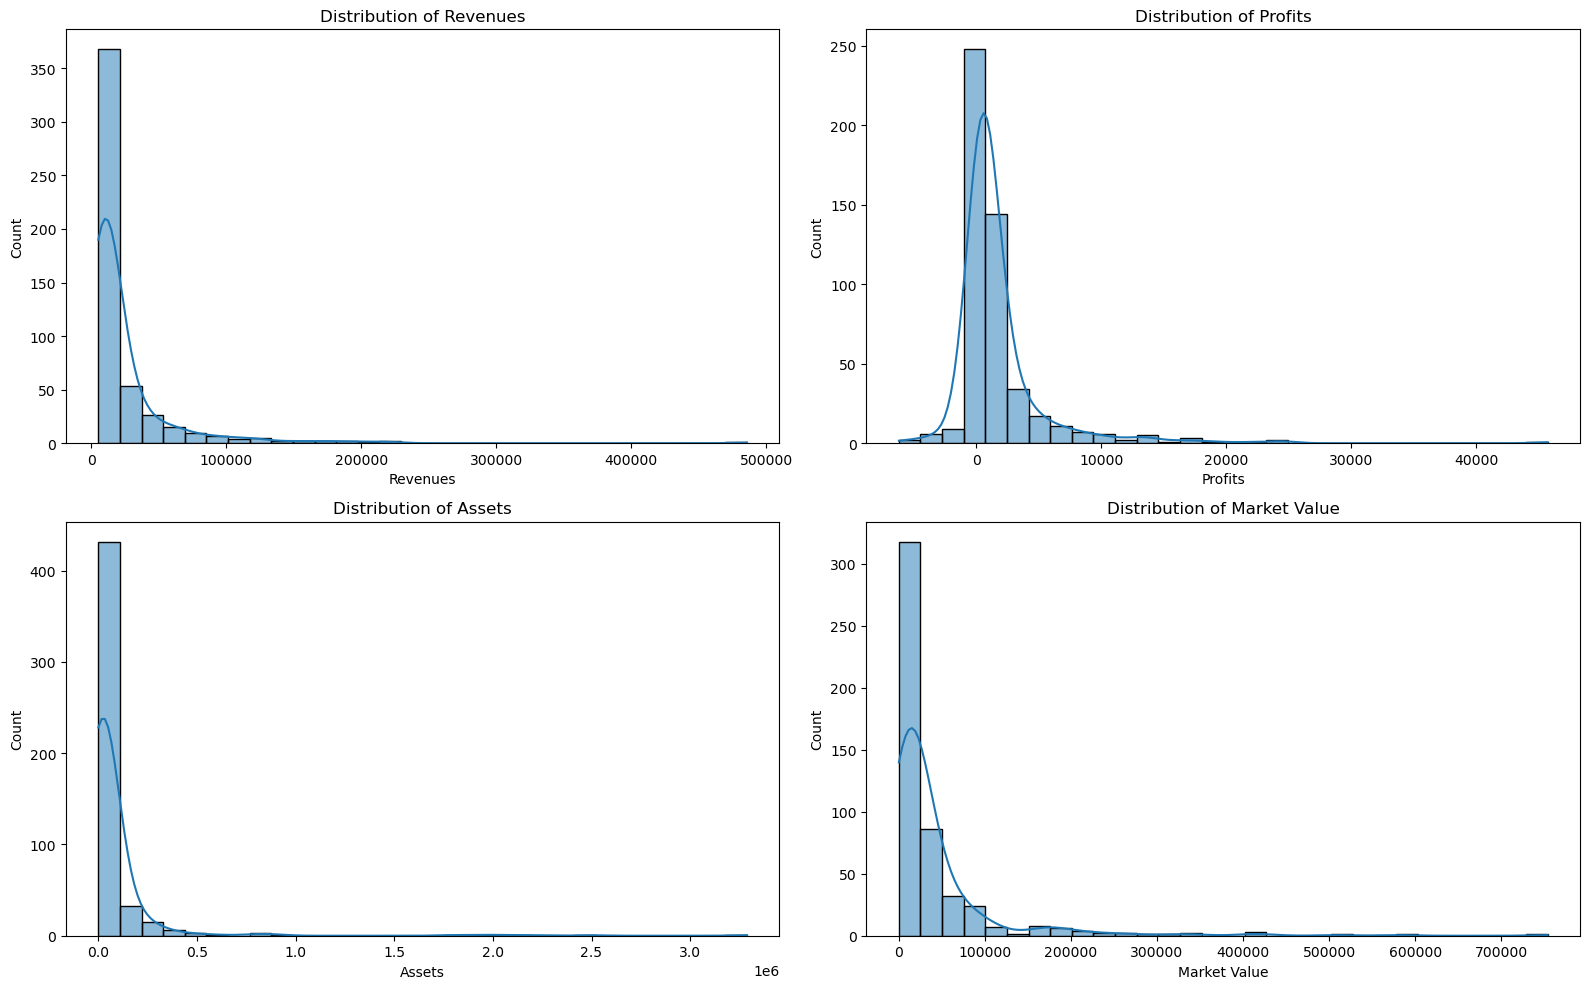

In [12]:
numeric_cols = ['Revenues', 'Profits', 'Assets', 'Market Value']

plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

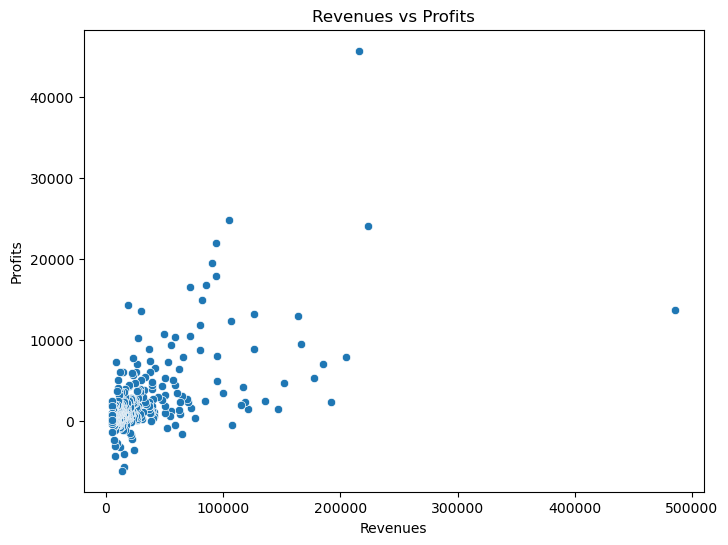

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenues', y='Profits', data=df)
plt.title('Revenues vs Profits')
plt.xlabel('Revenues')
plt.ylabel('Profits')
plt.show()

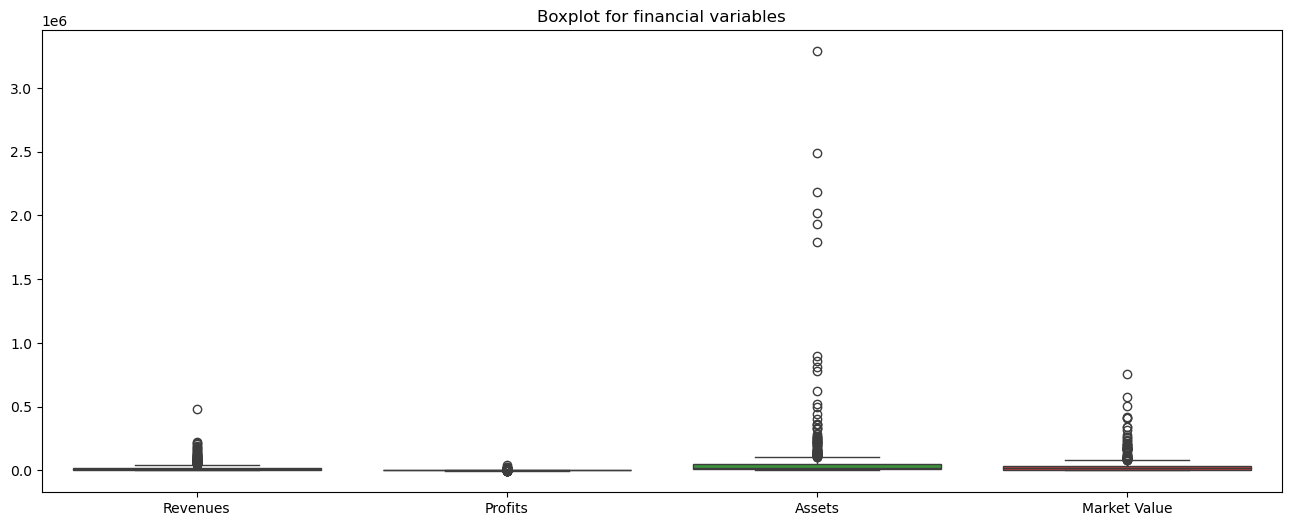

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot for financial variables')
plt.show()

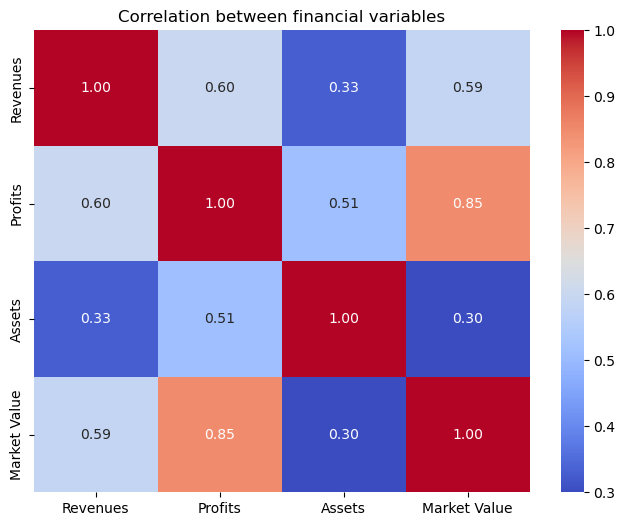

In [15]:
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between financial variables')
plt.show()